In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("task9.csv", sep=";")
df = df[df.index > 0]
df

,Проводимость,h,1,2,3,ПАВ,вода,C,lgC,sigma
1,28.1,22.333333,22.4,22.3,22.3,0.5,19.5,0.0004,-3.37,71.466667
2,63.9,20.833333,20.9,20.8,20.8,1.0,19.0,0.0009,-3.06,66.666667
3,125.5,17.333333,17.3,17.3,17.4,2.0,18.0,0.0018,-2.73,55.466667
4,195.1,13.433333,13.2,13.5,13.6,3.0,17.0,0.0029,-2.53,42.986667
5,238.0,11.733333,11.6,11.6,12.0,4.0,16.0,0.0042,-2.38,37.546667
6,200.0,11.566667,11.3,11.4,12.0,5.0,15.0,0.0055,-2.26,37.013333
7,345.0,11.233333,10.9,11.3,11.5,6.0,14.0,0.0071,-2.15,35.946667
8,392.0,11.700000,11.7,11.7,11.7,7.0,13.0,0.0089,-2.05,37.440000
9,514.0,11.400000,11.4,11.4,11.4,9.0,11.0,0.0136,-1.87,36.480000
10,557.0,11.300000,11.3,11.3,11.3,10.0,10.0,0.0166,-1.78,36.160000


Text(0, 0.5, 'Проводимость (микро Сименс на см)')

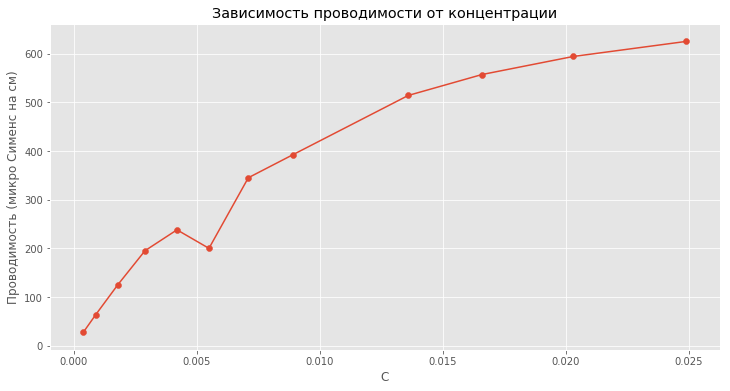

In [21]:
plt.figure(figsize=(12, 6))
plt.style.use("ggplot")
plt.plot(df["C"], df["Проводимость"])
plt.scatter(df["C"], df["Проводимость"])
plt.title("Зависимость проводимости от концентрации")
plt.xlabel("C")
plt.ylabel("Проводимость (микро Сименс на см)")

Text(0, 0.5, 'Поверхностное натяжение')

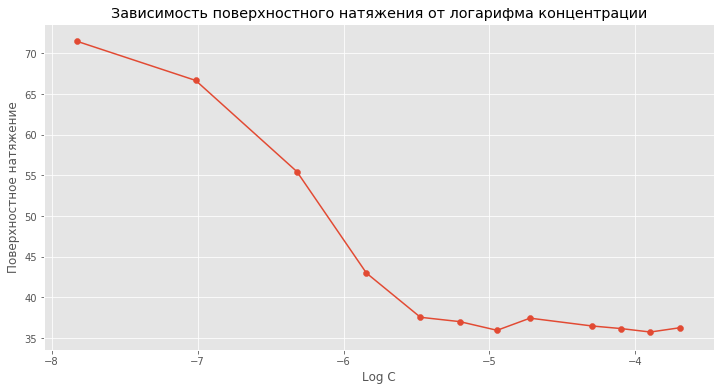

In [22]:
plt.figure(figsize=(12, 6))
plt.style.use("ggplot")
plt.plot(np.log(df["C"]), df["sigma"])
plt.scatter(np.log(df["C"]), df["sigma"])
plt.title("Зависимость поверхностного натяжения от логарифма концентрации")
plt.xlabel("Log C")
plt.ylabel("Поверхностное натяжение")

In [23]:
import scipy as sc
from scipy.stats import linregress

In [32]:
slope, intercept, r_value, p_value, std_err = linregress(np.log(df[df.index < 6]["C"]), df[df.index < 6]["sigma"])
C = intercept
b = -slope
T = 298
R = 8.314

In [33]:
b, C

(15.138056390131675, -43.488487250426694)

In [35]:
Г = b / (2 * R * T)
Г

0.00305501845963138

In [42]:
C = df[df.index == 9]["C"]
dG = R*T*np.log(C / (C + 55.5)).values[0]
dG

-20599.31038137549

In [45]:
dG = R*T*(1 + 0.7) * np.log(C / (C + 55.5)).values[0]
dG

-35018.82764833833